In [ ]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_signals = '/content/drive/MyDrive/exams_part2.hdf5'
signals_folder = h5py.File(path_to_signals, 'r')
first_signal = 648
last_signal = 3448
ecg_signal = np.array(signals_folder['tracings'][10,first_signal:last_signal,0])

In [ ]:
# Функция, преобразующая исходный сигнал в спектрограмму
def get_spectrogram(ecg_signal):
   spectrogram = tf.signal.stft(ecg_signal, frame_length=256, frame_step=128)         #Применяем к исходному сигналу кратковременное преобразование Фурье
   spectrogram = tf.abs(spectrogram)                                                  #Вычисляем амплитуду сигнала
   return spectrogram

In [ ]:
# Изобразим исходный сигнал ЭКГ
def show_ecg(ecg_signal):
  plt.figure(figsize=(12, 4))
  plt.plot(ecg_signal)
  plt.xlabel('Time',size = 13)
  plt.ylabel('Amplitude',size = 13)
  plt.title('График сигнала ЭКГ', size = 14)
  plt.grid(True)

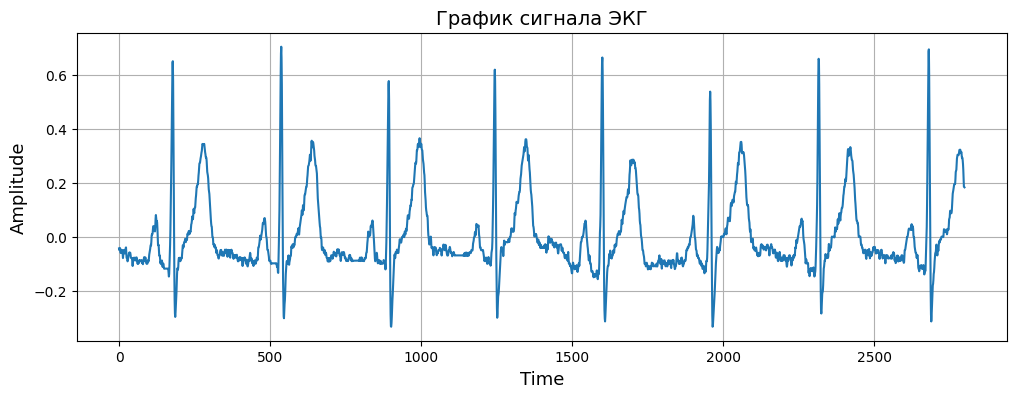

In [ ]:
show_ecg(ecg_signal)

In [ ]:
# Изобразим спектрограмму
def show_spectrogram(spectrogram):
  spectrogram = np.squeeze(spectrogram)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  plt.figure(figsize=(12, 4))
  plt.imshow(log_spec, aspect='auto', origin='lower')
  plt.colorbar(label='Power')
  plt.title('Спектрограмма сигнала ЭКГ', size = 14)
  plt.xlabel('Time',size = 13)
  plt.ylabel('Frequency',size = 13)

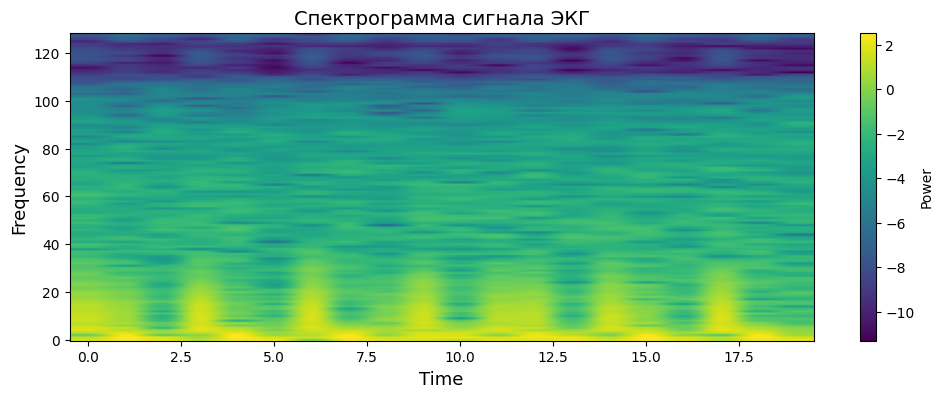

In [ ]:
show_spectrogram(get_spectrogram(ecg_signal))

In [ ]:
# Создание датасета из спектрограмм
def spectrogram_dataset(dataset, results):
  spec_signals = []
  spec_results = []
  for i in range (0, results.shape[0]):
    mas = []
    for lead in range (0,12):
      mas.append(np.array(get_spectrogram(dataset[i,:,lead])))
    mas1 = np.concatenate([mas[0][..., np.newaxis],mas[1][..., np.newaxis],mas[2][..., np.newaxis]
                           ,mas[3][..., np.newaxis],mas[4][..., np.newaxis],mas[5][..., np.newaxis],mas[6][..., np.newaxis],
                           mas[7][..., np.newaxis],mas[8][..., np.newaxis],mas[9][..., np.newaxis],mas[10][..., np.newaxis],
                           mas[11][..., np.newaxis]], axis = -1)
    spec_signals.append(mas1)
    spec_results.append(results[i])
  return np.array(spec_signals), np.array(spec_results)